# North Atlantic Subpolar Gyre Index from EOF analysis
### for VIKING20X paper

Use SSH to compute PC1 and PC 2 following Hatun and Chafik (2018) as well as Koul et al. (2020)

Defining an SPG index based on SSH EOF analysis:
"The first index (PC1 SSH) is defined as the principal component of the leading Empirical Orthogonal Function (EOF) of annual mean SSH anomalies in the subpolar North Atlantic, defined in the domain 20°N to 70°N, 0°W to 80°W (see Hakkinen and Rhines, 2004), and defined for the altimeter period 1993–2016. Similarly, the second index (PC2 SSH) is defined as the principal component of the second EOF of annual mean SSH anomalies." (Koul et al., 2020)

**The subpolar North Atlantic is defined as the region 20-70N, 0-80W** (Koul et al., 2020).
In fact, Hakkinen and Rhines used data that did not extend north of about 65N and not into the Hudson Bay. (cf H&R04 as well as Hatun and Chafik, 2018)

[EOF-software by Andrew Dawson](https://ajdawson.github.io/eofs/latest/):
Dawson, A., 2016. eofs: A Library for EOF Analysis of Meteorological, Oceanographic, and Climate Data. Journal of Open Research Software, 4(1), p.e14. DOI: http://doi.org/10.5334/jors.122

Monthly SPG index of H&C18 at https://bolin.su.se/data/chafik-2019-3

Time series of the subpolar gyre index in \Oj (thin black), \Vjs (thick black dotted), \Vjl (thick black solid) and \Vc (blue), and based on observations (orange).

Also provide mean and std.dev for 1990-2009 and correlations between time series

Vielleicht macht die Korrelation sowohl auf kurzen (1990-2009, dann mit Beobachtungen) als auch langen (1958-2009, dann nur Modelle; ohne die Trends werden die auch gut korreliert sein) Sinn. Letztendlich möchte ich damit zwei Aussagen dokumentieren: Die Modelle stimmen hinsichtlich der interannualen Variabilität gut mit den Beobachtungen überein. Die dekadische Variabilität ist über die einzelnen Experimente relativ robust. Beides dokumentiert die Wichtigkeit des Windantriebs. 

### Model runs
| Model | pen style | data path |
| --- | --- | --- |
| OJo (ORCA025-JRA-OMIP) | solid thin red | scalc01:/data/user/tomartin/Models/NEMO/orca025.l46/experiments/ORCA025.L46-KFS003-V/derived |
| OJo2 (ORCA025-JRA-OMIP-2nd) | dashed thin red | scalc01:/data/user/tomartin/Models/NEMO/orca025.l46/experiments/ORCA025.L46-KFS003-V-2nd/derived |
| OJ (ORCA025-JRA) | solid thin green | nesh-fe:/sfs/fs1/work-geomar3/smomw091/SDIR/ORCA025.L46/ORCA025.L46-KFS001-V/1m/ |
| OJst (ORCA025-JRA-strong) | dashed thin green | blogin:/scratch/usr/shkifmfs/shared/ORCA025.L46-KFS006_monthly_SSH |
| VJo (VIKING20X-JRA-OMIP) | solid red | scalc01:/data/user/tomartin/Models/NEMO/viking20x.l46/experiments/VIKING20X.L46-KFS003/derived |
| VJl (VIKING20X-JRA-long) | solid blue | nesh-fe:/sfs/fs1/work-geomar3/smomw091/SDIR/VIKING20X.L46/VIKING20X.L46-KFS001-S/1m/ |
| VJs (VIKING20X-JRA-short) | dashed blue | nesh-fe:/sfs/fs1/work-geomar3/smomw091/SDIR/VIKING20X.L46/VIKING20X.L46-KKG36107B-S/1m/ |
| VC (VIKING20X-CORE) | solid black | nesh-fe:/sfs/fs1/work-geomar3/smomw091/SDIR/VIKING20X.L46/VIKING20X.L46-KKG36013H-S/1m/ |
| Observations | solid orange | scalc01:/data/user/tomartin/Observations/SSH/ |

### AVISO+ observations

adt:long_name = "Absolute dynamic topography" ;
adt:standard_name = "sea_surface_height_above_geoid" ;
adt:units = "m" ;
adt:comment = "The absolute dynamic topography is the sea surface height above geoid; the adt is obtained as follows: adt=sla+mdt where mdt is the mean dynamic topography; see the product user manual for details" ;

sla:long_name = "Sea level anomaly" ;
sla:standard_name = "sea_surface_height_above_sea_level" ;
sla:units = "m" ;
sla:comment = "The sea level anomaly is the sea surface height above mean sea surface; it is referenced to the [1993, 2012] period; see the product user manual for details" ;


### Initalization:

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from eofs.xarray import Eof

In [2]:
save_figure=True

projname='figure10'
projpath='/home/tomartin/Projects/VIKING20X/'
figpath=projpath+'Figures/'

aviso_varname='adt' # adt or sla where adt is the better match for NEMO's diagnosed sossheig

In [3]:
SMALL_SIZE=18
MED_SIZE=24
BIG_SIZE=28
plt.rc('font',   size     =SMALL_SIZE)    # controls default text sizes
plt.rc('axes',   titlesize=SMALL_SIZE)    # fontsize of the axes title
plt.rc('axes',   labelsize=MED_SIZE)      # fontsize of the x and y labels
plt.rc('xtick',  labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick',  labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize =SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIG_SIZE)      # fontsize of the figure title

In [4]:
workdir='/sfs/fs1/work-geomar5/smomw135/Models/NEMO/' # NESH
workdir='/data/user/tomartin/Models/NEMO/' # GEOMAR

obspath='/data/user/tomartin/Observations/SSH/MonthlyMean/dt_global_allsat_phy_l4_mm_1993-2018_'+aviso_varname+'.nc'

shortname=['OJo','OJo2','Oj','Ojst',
           'VJo','Vjl','Vjs','Vc','Obs']
longname=['ORCA025-JRA-OMIP','ORCA025-JRA-OMIP-2nd','ORCA025-JRA','ORCA025-JRA-strong',
          'VIKING20X-JRA-OMIP','VIKING20-JRA-long','VIKING20-JRA-short','VIKING20-CORE','Observations']
modelname=['orca025.l46','orca025.l46','orca025.l46','orca025.l46',
           'viking20x.l46','viking20x.l46','viking20x.l46','viking20x.l46','aviso.']
expname=['ORCA025.L46-KFS003-V','ORCA025.L46-KFS003-V-2nd','ORCA025.L46-KFS001-V','ORCA025.L46-KFS006',
         'VIKING20X.L46-KFS003','VIKING20X.L46-KFS001','VIKING20X.L46-KKG36107B','VIKING20X.L46-KKG36013H','AVISO']
year1=['1958','1958','1958','1958',
       '1958','1958','1980','1958','1993']
year2=['2019','2019','2019','2019',
       '2019','2019','2019','2009','2018']

penwid=[1,1,1,1,3,3,3,3,3]
pensty=['-','--','-','--','-','-','--','-','-']
dshsty=[[1,0],[6,4],[1,0],[6,4],[1,0],[1,0],[6,4],[1,0],[1,0]]
pencol=['r','r',(0,.6,0),(0,.6,0),'r','b','b','k',(1,.7,0)]

### Functions:

In [6]:
def get_cellarea(gridname):
    """
    returns grid-cell areas computed from e1t and e2t
    """
    gridname=gridname.lower()
    if gridname == 'orca05':
        meshfile='/home/tomartin/ModelGrids/NEMO-ORCA05/ORCA05.L46_mesh_mask.nc'
    elif gridname == 'orca025':
        meshfile='/home/tomartin/ModelGrids/NEMO-ORCA025/mesh_hgr.nc'
    elif gridname == 'viking20x':
        meshfile='/home/tomartin/ModelGrids/NEMO-VIKING20X/mesh_mask.nc'
    elif gridname == '1_viking20x':
        meshfile='/home/tomartin/ModelGrids/NEMO-VIKING20X/1_mesh_mask.nc'
    else:
        print('ERROR in get_cellarea: gridname',gridname,'not implemented')
        return
    ds=xr.open_dataset(meshfile)
    area=(ds.e1t*ds.e2t).squeeze()
    return area.values

def get_tmask0(gridname):
    """
    returns land-sea mask for surface layer of T-grid
    """
    gridname=gridname.lower()
    if gridname == 'orca05':
        meshfile='/home/tomartin/ModelGrids/NEMO-ORCA05/ORCA05.L46_mesh_mask.nc'
    elif gridname == 'orca025':
        meshfile='/home/tomartin/ModelGrids/NEMO-ORCA025/mask.nc'
    elif gridname == 'viking20x':
        meshfile='/home/tomartin/ModelGrids/NEMO-VIKING20X/mesh_mask.nc'
    elif gridname == '1_viking20x':
        meshfile='/home/tomartin/ModelGrids/NEMO-VIKING20X/1_mesh_mask.nc'
    else:
        print('ERROR in get_cellarea: gridname',gridname,'not implemented')
        return
    ds=xr.open_dataset(meshfile)
    tmask0=ds.tmask.isel(z=0)
    tmask0=tmask0.where(tmask0>0).squeeze()
    return tmask0.values

def get_ssh_glbm(dataset,gridname):
    """
    returns global mean SSH using grid-cell area weighted averaging
    """
#    gridname=dataset.name[dataset.name.rfind('/')+1:dataset.name.find('.L46')].lower()
    gridname=gridname.lower()
    mask=get_tmask0(gridname)
    area=get_cellarea(gridname)*mask
    ssh=(dataset.sossheig*area).sum(('y','x'),skipna=True)/np.nansum(area)
    try:
        ssh=shh.reset_coords('time_centered',drop=True)
        print('time_centered removed')
    except:
        print('no time_centered found')
    return ssh #.values

def get_ssh_spg(dataset,gridname):
    """
    returns the mean SSH at (57˚N,52˚W) corrected by the global mean SSH
      a spatial mean over a box of approx. 2˚x2˚ is computed
      using grid-cell area weighted averaging
    """
    # (i,j) locations of (57N,52W)
#    gridname=dataset.name[dataset.name.rfind('/')+1:dataset.name.find('.L46')].lower()
    gridname=gridname.lower()
    if gridname == 'orca05':
        j57n=388; i52w=475; nspan=2; jfac=2 # LAT 57.03027 LON -51.841125
    elif (gridname == 'orca025') or (gridname == 'viking20x'):
        j57n=776; i52w=950; nspan=4; jfac=2 # LAT 57.03027 LON -51.841125
    elif gridname == '1_viking20x':
        j57n=np.nan
        i52w=np.nan
        nspan=np.nan
    elif gridname == 'aviso':
        j57n=588; i52w=1232; nspan=4; jfac=1 # LAT 57.125 LON -51.875
    else:
        print('ERROR in get_ssh_spg: gridname',gridname,'not implemented')
        return
    jslice=slice(j57n-nspan*jfac,j57n+nspan*jfac+1)
    islice=slice(i52w-nspan,i52w+nspan+1)
    #
    if gridname != 'aviso':
        # get masked grid-cell area
        mask=get_tmask0(gridname)[jslice,islice]
        area=get_cellarea(gridname)[jslice,islice]*mask
        # get global mean SSH
        ssh_glbm=get_ssh_glbm(dataset,gridname)
        # compute SSH at SPG center
        ssh=(dataset.sossheig.isel(y=jslice,x=islice).squeeze()*area).sum(('y','x'),skipna=True)/np.nansum(area)
    else:
        # get masked grid-cell area
        mask=get_mask_aviso()[jslice,islice]
        area=get_cellarea_aviso()[jslice,islice]*mask
        # get global mean SSH
        ssh_glbm=get_ssh_glbm_aviso(dataset)
        # compute SSH at SPG center
        ssh=eval('(dataset.'+aviso_varname+'.isel(latitude=jslice,longitude=islice).squeeze()*area).sum((\'latitude\',\'longitude\'),skipna=True)/np.nansum(area)')
    ssh=ssh-ssh_glbm.values
    return ssh #.values

def get_ssh_NA(dataset,gridname):
    """
    returns a cropped SSH array with only the region 30-70N, 80W-10E
    and grid cell areas for same region
    """
    gridname=gridname.lower()
    if gridname == 'orca05':
        yslice=slice(289,430)
        xslice=slice(412,574)
    elif gridname == 'orca025':
        yslice=slice(578,860)
        xslice=slice(824,1148)
    elif gridname == 'viking20x':
        yslice=slice(578,860)
        xslice=slice(824,1148)
    elif gridname == '1_viking20x':
        print('ERROR: subdomain for EOF not yet specified')
        return
    elif gridname == 'aviso':
        xslice=slice(1120,1440)
        yslice=slice(440,640)    #
    if gridname != 'aviso':
        mask=get_tmask0(gridname); mask=mask[yslice,xslice]
        area=get_cellarea(gridname); area=area[yslice,xslice]
        ssh=dataset.sossheig.isel(y=yslice,x=xslice)*mask
        try:
            ssh=shh.reset_coords('time_centered',drop=True)
            print('time_centered removed')
        except:
            print('no time_centered found')
    else:
        mask=get_mask_aviso()[yslice,xslice]
        area=get_cellarea_aviso()[yslice,xslice]*mask
        ssh=eval('dataset.'+aviso_varname+'.isel(latitude=yslice,longitude=xslice).squeeze()')
    #
    return ssh,area #.values

def get_cellarea_aviso():
    """
    Read grid-cell area for AVISO data
    computed with cdo gridarea
    """
    area=xr.open_dataset('/data/user/tomartin/Observations/SSH/gridcellarea.nc').cell_area.squeeze().values
    return area

def get_mask_aviso():
    """
    Derive land-sea mask from data
    """
    ssh=eval('xr.open_dataset(obspath,decode_times=False).'+aviso_varname+'.sum(\'time\').squeeze()')
    mask=ssh*0.0+1.0
    return mask.values

def get_ssh_glbm_aviso(dataset):
    mask=get_mask_aviso()
    area=get_cellarea_aviso()*mask
    ssh=eval('(dataset.'+aviso_varname+'*area).sum((\'latitude\',\'longitude\'),skipna=True)/np.nansum(area)')
    return ssh #.values

    

### SPG index plots

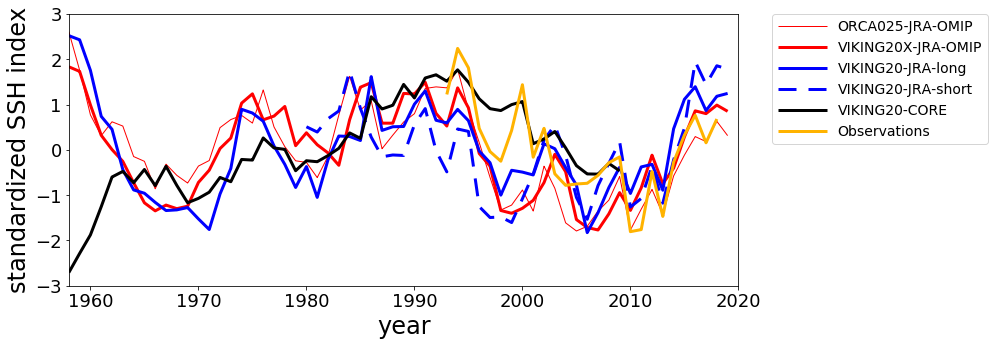

In [17]:
use_ym=True   # compute annual means
use_ts=True   # use already computed timeseries (False for reading from original data)

eof_n=2
eof_sign=[1,-1,-1,1,-1,-1,-1,1,1] # set sign of PC to align all data sets (EOF analysis may yield mirrored patterns)
imode=1

ref_period=(1990,2009)

fig,ax=plt.subplots(figsize=(12,5))

#for irun in range(0,9):
for irun in np.array([0,4,5,6,7,8]):
#    print('irun=',irun)
    if use_ts:
        npzfile = np.load('ProcessedData/'+projname+'_ts_'+str(irun)+'.npz')
        ssh_pc=npzfile['pc']
        time=npzfile['time']
    else:
        gridname=modelname[irun][0:modelname[irun].find('.')]
        if irun == len(shortname)-1:
            inpath=obspath
            ds=xr.open_dataset(inpath)
            ssh_gm_ltm=get_ssh_glbm_aviso(ds).mean()
        else:
            inpath=workdir+modelname[irun]+'/experiments/'+expname[irun]+'/derived/'+expname[irun]+'_1m_'+year1[irun]+'0101_'+year2[irun]+'1231_sossheig.nc'
            ds=xr.open_dataset(inpath).rename({'time_counter':'time'})
            ssh_gm_ltm=get_ssh_glbm(ds,gridname).mean()
        ssh,wgts=get_ssh_NA(ds,gridname)
        wgts=wgts/np.sum(wgts)
        if use_ym:
            ssh=ssh.groupby('time.year').mean('time')
            time=np.arange(int(year1[irun]),int(year2[irun])+1,1)
        else:
            time=np.arange(int(year1[irun]),int(year2[irun])+1,1/12)
        data=(ssh-ssh_gm_ltm).rename({'year':'time'})
        # EOF:
        eof_solver = Eof(data, weights=wgts)
        ssh_eof = eof_solver.eofs(neofs=eof_n)
        ssh_pc  = eof_solver.pcs(npcs=eof_n,pcscaling=1) # scaled to unit variance
        ssh_var = eof_solver.varianceFraction(neigs=eof_n)*100 # in %
        # save result:
        np.savez('ProcessedData/'+projname+'_ts_'+str(irun)+'.npz',eof=ssh_eof,pc=ssh_pc,var=ssh_var,time=time)
        ssh_pc=ssh_pc.values
    #            
    ssh_spg=ssh_pc[:,imode] # 2nd mode is SPG index according to Koul et al
    #
    ax.plot(time,ssh_spg*eof_sign[irun],
        color=pencol[irun],linestyle=pensty[irun],dashes=dshsty[irun],linewidth=penwid[irun],
        label=longname[irun])

ax.legend(bbox_to_anchor=(1.05, 1.), loc='upper left',
    ncol=1, borderaxespad=0., fontsize=14, handlelength=3.5)#, mode="expand")

plt.xlabel('year')
plt.ylabel('standardized SSH index')
plt.xlim([1958,2020])
plt.ylim([-3,3])

if save_figure:
    plt.savefig(figpath+projname+'.pdf',bbox_inches='tight')
    plt.savefig(figpath+projname+'.png',dpi=300,bbox_inches='tight')


### compute correlations

In [40]:
print('correlationsfor 1993-2009')
ref_period=(1993,2009)
# observations as reference:
for i,irun in enumerate((8,0,4,5,6,7)):
    npzfile = np.load('ProcessedData/'+projname+'_ts_'+str(irun)+'.npz')
    ssh_pc=npzfile['pc']
    ssh_spg=ssh_pc[:,imode]
    time=npzfile['time']
    t1=np.min(np.where(time>=ref_period[0]))
    t2=np.max(np.where(time<=ref_period[1]))
    if i == 0:
        ref=ssh_spg[t1:t2]*eof_sign[irun]
    else:
        exp=ssh_spg[t1:t2]*eof_sign[irun]
        r,p=stats.pearsonr(ref,exp)
        print('Observations with','{:<18}'.format(longname[irun]),'{:5.2f}'.format(r),'at signif.level','{:5.2f}'.format(1-p))
        
        
print('')
print('correlations for 1958-2009')
ref_period=(1958,2009)
# ORCA025-JRA as reference:
for i,irun in enumerate((7,0,1,2,3,4,5)):
    npzfile = np.load('ProcessedData/'+projname+'_ts_'+str(irun)+'.npz')
    ssh_pc=npzfile['pc']
    ssh_spg=ssh_pc[:,imode]
    time=npzfile['time']
    t1=np.min(np.where(time>=ref_period[0]))
    t2=np.max(np.where(time<=ref_period[1]))
    if i == 0:
        ref=ssh_spg[t1:t2]*eof_sign[irun]
        refname=longname[irun]
    else:
        exp=ssh_spg[t1:t2]*eof_sign[irun]
        r,p=stats.pearsonr(ref,exp)
        print('{:<12}'.format(refname),'with','{:<18}'.format(longname[irun]),'{:5.2f}'.format(r),'at signif.level','{:5.2f}'.format(1-p))


correlationsfor 1993-2009
Observations with ORCA025-JRA-OMIP    0.86 at signif.level  1.00
Observations with VIKING20X-JRA-OMIP  0.71 at signif.level  1.00
Observations with VIKING20-JRA-long   0.76 at signif.level  1.00
Observations with VIKING20-JRA-short  0.34 at signif.level  0.80
Observations with VIKING20-CORE       0.85 at signif.level  1.00

correlations for 1958-2009
VIKING20-CORE with ORCA025-JRA-OMIP    0.05 at signif.level  0.26
VIKING20-CORE with ORCA025-JRA-OMIP-2nd  0.48 at signif.level  1.00
VIKING20-CORE with ORCA025-JRA         0.52 at signif.level  1.00
VIKING20-CORE with ORCA025-JRA-strong -0.18 at signif.level  0.78
VIKING20-CORE with VIKING20X-JRA-OMIP  0.14 at signif.level  0.69
VIKING20-CORE with VIKING20-JRA-long   0.09 at signif.level  0.47
